<a href="https://colab.research.google.com/github/MauJuarez/IBM_Python_Data_Analysis/blob/main/IBM_MOD_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook correspondiente al 3er Modulo del curso de IBM Data Analysis with Python




<h2 id="Se importan las librerias adecuadas">Se importan las librerias adecuadas</h2>
<h4></h4>
Aqui primero se importaran las librerias pandas, matplotlib y numpy, además que se añaden dos lineas más que nos dejan controlar cuantos renglones se mostraran.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #esta es nueva


In [ ]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [ ]:
df=pd.read_csv(filename,header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2 id = 'Pattern Visualization'> 2. Analyzing Individual Feature Patterns Using Visualization </h2>

 Para graficar en un jupyter notebook se usa

In [ ]:
%matplotlib inline  

<h4> How to choose the right visualization method? </h4>
<p>Its important to first understand what type of variable you are dealing with. </p>

In [ ]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [ ]:
df['peak-rpm'].dtypes

dtype('float64')

For example we can calculate the correlation between variables of type 'int64' or 'float64' using the method 'corr'

In [ ]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


The diagonal elements are always one; we will study correlation.

In [ ]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<h2> Continous Numerical Variables: <\h2>
<p>Continuos numerical variables are variables that may contain any avalue within some range. They can be 'int64' or 'float64'. A great way to visualize these variables is by using scatterplots with fitted lines.<\p>
In order to stard understanding the (linear) relationship between an individual variable and the price, we can use 'regplot' wich plots the scatterplot plus the fitted regression line for the data

<h4> Positive Linear Relationship
<p> Let's find the scatterplot of engine-size and price. Engine-size as potential predictor variable of price.

(0.0, 53407.66895934597)

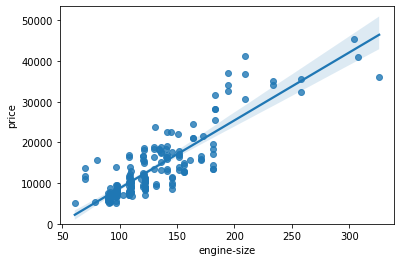

In [ ]:
sns.regplot(x='engine-size',y='price', data=df)
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine the correlation between 'engine-size' and the price is approximately 0.87.

In [ ]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway ,pg is a potential predictor variable of price. Let's find the scatterplot.

<Axes: xlabel='highway-mpg', ylabel='price'>

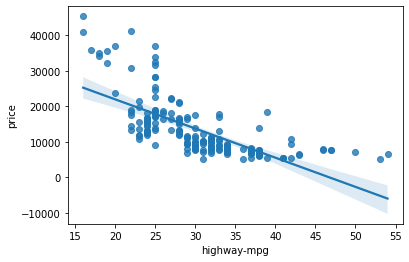

In [ ]:
sns.regplot(x='highway-mpg',y='price', data=df)

In [ ]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


As Highway mph goes up, price goes down this indicates an inverse/negative relationship, highway mpg could be a predictor of price, their correlation is approximately -0.704

<h4> Weak Linear Relationship

Lets see if 'peak-rpm' is a predictor of price

<Axes: xlabel='peak-rpm', ylabel='price'>

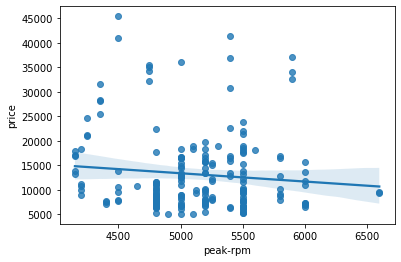

In [ ]:
sns.regplot(x='peak-rpm',y='price', data=df)


In [ ]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Peak rpm does not seem like a good predictor since the regression line is close to horizontal. Data points are also very scattered and far from the fitted line, shows lots of variability. An their correlationn is approximately -0.1016

<Axes: xlabel='stroke', ylabel='price'>

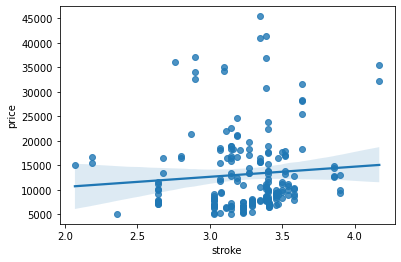

In [ ]:
sns.regplot(x='stroke',y='price', data=df)

In [ ]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<h3> Categorical Variables

These variables that describe a 'characteristic' pf data unit, and are selected from a small group of categories, they can have the type 'object' of 'int64', a good way to visualize them is by using boxplots.


The relationship between 'body-style' and 'price'

<Axes: xlabel='body-style', ylabel='price'>

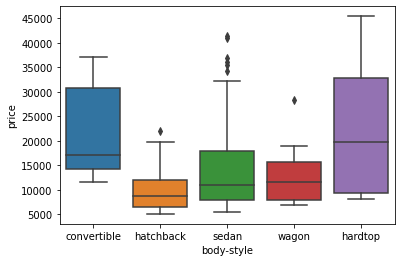

In [ ]:
sns.boxplot(x='body-style', y='price',data=df)

We can see thatbthe distribution of price bewtween teh different body style categories have significant overlap, so bodystyle is not a good predictor of price. But what about engine-location

<Axes: xlabel='engine-location', ylabel='price'>

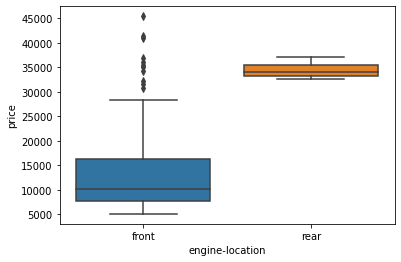

In [ ]:
sns.boxplot(x='engine-location', y='price',data=df)

Here we can see that the distribution of price between these two categories, front and rear, are distinct enough to take engine location as a potential good predictor.

Lets examine drive wheels and price

<Axes: xlabel='drive-wheels', ylabel='price'>

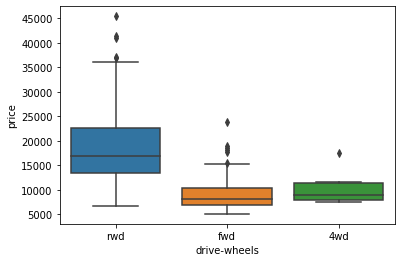

In [ ]:
sns.boxplot(x='drive-wheels', y='price',data=df)

We can see that drive wheels could be potentially be a predictor.

<h2> Descriptive Statistical Analysis

In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


We can apply method describe on variable type object as follows

In [ ]:
df.describe(include= ['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


<h3> Value Counts

Value Counts is a good way of undersatnding how many units of each characteristic/variable we have. We can apply the 'value_counts' method on the column 'drive_wheels' It only works on pandas series, not on dataframes. It means just in df['drive wheels'] not with two brackets (parentesis cuadrados)

In [ ]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

We can convert the series to a dataframe as follows:

In [ ]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


We are going to change some columns

In [ ]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'},inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


Lets rename the index to 'drive_wheels'

In [ ]:
drive_wheels_counts.index.name='drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


We can repeat the above process for the variable 'engone-location'

In [ ]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location':'value_counts'},inplace=True)
engine_loc_counts.index.name='engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


After examining the value of the engine location, we see that engine loc, would not be a good predictor variable for the price. This is because we have only 3 cars with rear engine and the rest with an engine in front, so tne result is skwewd (sesgada). We are not able to draw any conclusion about engine location.

<h3> Basics Of Grouping

The groupby method grouo data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups. For example, let's group by the variable 'drive-wheels', we see that are 3 different categories of drive wheels

In [ ]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we wanted to know, on average, which type of drive wheels, is most valuable, we can group 'drive wheels' and them average them.
We can select the columns 'drive wheels' 'body style' and 'price' then assign it to the variable 'df_group_one'

In [ ]:
df_group_one=df[['drive-wheels','body-style','price']]
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


We can calculate the avergae price for each of different categories of data.
Grouping results

In [ ]:
df_group_one=df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Four our data, it seems rear wheel drive vehicles are, on avergae, the most expensive, whie 4wd fwd are approximately the same price. You can also group by multiple variables. For example, lets group by both 'drive wheels' and 'body style', This groups the dataframe by the unique combination of 'drive wheels, and 'body style'. We can store the results in the variable 'grouped test1'

In [ ]:
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1=df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


We can convert the dataframe into a pivot table(como tabla dinamica de excel), using pivot. In this case we will leave 'drive wheels' as the rows amd 'body style' as columns

In [ ]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often we dont have data for some of pivot cells, we can fill these missing cell with the value 0, but any other value could potentially be used as well.

In [ ]:
grouped_pivot =grouped_pivot.fillna(0)  #here we fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Lets find the average price of each car based on body style

In [ ]:
df_gptest1=df[['body-style','price']]
grouped_test2=df_gptest1.groupby(['body-style'],as_index=False).mean()
grouped_test2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<h2>Drive Wheels and Body Style vs Price

Heat map, to visualize the relation ship

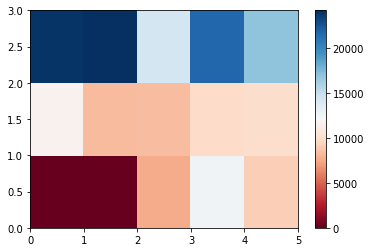

In [ ]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<h2> Correlation and Causation

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two. Correlation does not imply causation. Dtermining correlation is much simpler than determining causation as causation may requiere independent experimentation

Pearson Correlation. This measures the linear dependence between two variables X and Y, the resulting coefficient is value between -1 and 1.

1: Perfect positive linear correlation

0: No linear correlation, the two variables most likely do not affcet each other

-1: Perfect Negative correlation

Pearson correlation is the default method of corr(), we can calculate the Pearson Correlation of the 'int64' and 'int64' variables



<h2> P-Value
<p> The P Value is the probability value that the correlation between these two variables is statitically significant. Normally we choose a significance level of 0.05, wich means that we  are 95% confident that the correlation between the variables is significant. By convention:



*   p value is < 0.001 we say there is strong evidence that the correlation is significant
*  p value is < 0.05 there is moderate evidence that the correlation is significant
*   p value is < 0.1 there is weak evidence that the correlation is significant
*   p value is > 0.1 No evidence that the correlation is significant 





We can obtain this information usig stats module in the scipy library

In [ ]:
from scipy import stats

<h2> Wheel Base vs Price

Let's calculate the Pearson Correlation Coefficient and P-Value of 'wheel base' and 'price'

In [ ]:
person_coef, p_value =stats.pearsonr(df['wheel-base'],df['price'])
print(f'The Pearson Correlation Coefficient is {person_coef}, with P Value of P= {p_value}')

The Pearson Correlation Coefficient is 0.584641822265508, with P Value of P= 8.076488270732885e-20


<h3> Conclusion
<p> Since p-value is <0.001 the correlation between wheel-base and price is statiscally significant, although the linear relationship isn't extremly strong (~0.585).

<h2> Horsepower vs Price

In [ ]:
person_coef, p_value =stats.pearsonr(df['horsepower'],df['price'])
print(f'The Pearson Correlation Coefficient is {person_coef}, with P Value of P= {p_value}')

The Pearson Correlation Coefficient is 0.8095745670036559, with P Value of P= 6.369057428259557e-48


Since p-value is <0.001 the correlation between wheel-base and price is statiscally significant, and the linear relationship is quite strong (~0.809, close to 1).

<h2> Lenght vs Price

In [ ]:
person_coef, p_value =stats.pearsonr(df['length'],df['price'])
print(f'The Pearson Correlation Coefficient is {person_coef}, with P Value of P= {p_value}')

The Pearson Correlation Coefficient is 0.6906283804483638, with P Value of P= 8.016477466159723e-30


Since p-value is <0.001 the correlation between wheel-base and price is statiscally significant, and the linear relationship is moderately strong (~0.691)

<h3> Width vs Price

In [ ]:
person_coef, p_value =stats.pearsonr(df['width'],df['price'])
print(f'The Pearson Correlation Coefficient is {person_coef}, with P Value of P= {p_value}')

The Pearson Correlation Coefficient is 0.7512653440522673, with P Value of P= 9.20033551048206e-38


Since p-value is <0.001 the correlation between wheel-base and price is statiscally significant, and the linear relationship is quite strong (~0.751)

<h3> Curb-Weight vs Price

In [ ]:
person_coef, p_value =stats.pearsonr(df['curb-weight'],df['price'])
print(f'The Pearson Correlation Coefficient is {person_coef}, with P Value of P= {p_value}')

The Pearson Correlation Coefficient is 0.8344145257702843, with P Value of P= 2.189577238893965e-53


Since p-value is <0.001 the correlation between wheel-base and price is statiscally significant, and the linear relationship is quite strong (~0.834)

<h2> ANOVA: Analysis of Variance

ANOVA is a statistical method used to test whether there are significant differences between the means of two or more grpups. ANOVA returns two parameters:

F-test score: ANOVA assumes that the means of all groups are the same, and calculates how much the actual means deviate from that assumption and reports it as the F score

P value: tells how statistically significant our calculated value score is

If our price variable is strongly correlated with the variable we are analyzing we expect ANOVA to return a sizeable F test and small p value

<h3> Drive Wheels 

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm average the data automatically, we do not need to take the average before hand.

To see if different types of 'drive - wheels' impact 'price' we group the data

In [ ]:
df_gptest = df[['drive-wheels','body-style','price']]
group_test2 = df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])
group_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


We can obtain the values of the method group using the method 'get_group'

In [ ]:
group_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

We can use the function 'f_oneway' in the module 'stats' to obtain the F test Score and P Value

In [ ]:
f_val, p_val = stats.f_oneway(group_test2.get_group('fwd')['price'], group_test2.get_group('rwd')['price'],group_test2.get_group('4wd')['price'])
print(f"ANOVA results: F= {f_val}, P= {p_val}")

ANOVA results: F= 67.95406500780399, P= 3.3945443577151245e-23


This is a great result with a large F test score, showing a striong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested group are all this highly correlated?

<h3> IMPORTANT VARIABLES

We now have a better idea of what our data looks like and wich variables are important to take into acoount when predicting the car price. We have narrowed it down to the dollowing variables:

Continous Numerical Variables:


*   Length
*   Width
*   Curb Weight
*   Engine size
*   Horse power
*   City mpg
*   Highway mpg
*   Wheel bore
*   Bore




Categorical  Variables:


*   Drive Wheels